In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [5]:
import pathos

print(pathos.__version__)

0.3.1


In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams['pdf.fonttype'] = 42

In [3]:
sc_tl_result = pd.read_parquet('/data/scPAFA_paper_formal/benchmark/compare_CRC_10k/20240804_CRC_10K_fasttl.parquet')

In [4]:
sc_uc_result = pd.read_parquet('/data/scPAFA_paper_formal/benchmark/compare_CRC_10k/20240804_CRC_10K_fastuc.parquet')

In [5]:
aucell_result =  pd.read_csv('/data/scPAFA_paper_formal/benchmark/compare_CRC_10k/CRC_aucell.csv',index_col=0)

In [6]:
aucell_result.columns = sc_uc_result.columns

In [7]:
#correlations = []
similarity_list1 = []
for row in sc_tl_result.index:
    #correlation = sc_uc_result.loc[:,col].corr(sc_tl_result.loc[:,col])
    #correlations.append(correlation)
    sc_uc_row = sc_uc_result.loc[row,:].values.reshape(1, -1)
    sc_tl_row = sc_tl_result.loc[row,:].values.reshape(1, -1)
    similarity = cosine_similarity(sc_uc_row, sc_tl_row)
    similarity_list1.append(similarity[0][0])
#correlations_df = pd.DataFrame(correlations, columns=['Correlation'], index=sc_tl_result.columns)
similarity_df1 = pd.DataFrame(similarity_list1, columns=['similarity'], index=sc_tl_result.index)
#print(correlations_df.mean())
print(similarity_df1.mean())

similarity    0.792562
dtype: float64


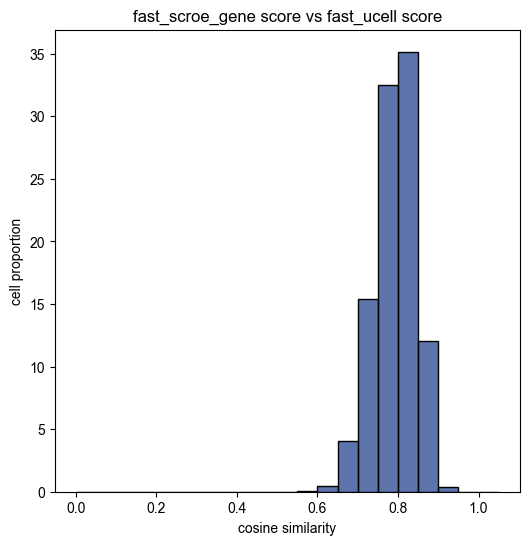

In [8]:
# 绘制相关系数的分布
plt.figure(figsize=(6, 6))
bins = np.arange(0, 1.1, 0.05)
sns.histplot(similarity_list1, bins=bins, kde=False, stat='percent',color='#274690')
plt.title('fast_scroe_gene score vs fast_ucell score')
plt.xlabel('cosine similarity')
plt.ylabel('cell proportion')
#plt.savefig('./GSVA_SSGSEA_corr/20240715_CRC_TCGA_GSVA_ssGSEA_corr.pdf',bbox_inches = "tight",transparent=True)
plt.show()

In [9]:
#correlations = []
similarity_list2 = []
for row in sc_tl_result.index:
    #correlation = aucell_result.loc[:,col].corr(sc_tl_result.loc[:,col])
    #correlations.append(correlation)
    aucell_row = aucell_result.loc[row,:].values.reshape(1, -1)
    sc_tl_row = sc_tl_result.loc[row,:].values.reshape(1, -1)
    similarity = cosine_similarity(aucell_row, sc_tl_row)
    similarity_list2.append(similarity[0][0])
#correlations_df = pd.DataFrame(correlations, columns=['Correlation'], index=sc_tl_result.columns)
similarity_df2 = pd.DataFrame(similarity_list2, columns=['similarity'], index=sc_tl_result.index)
#print(correlations_df.mean())
print(similarity_df2.mean())

similarity    0.786981
dtype: float64


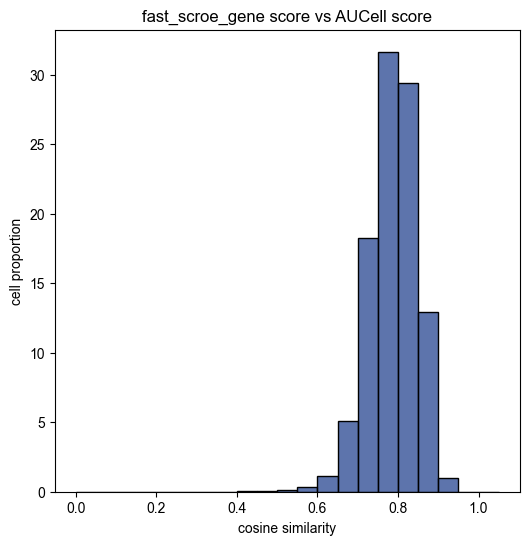

In [10]:
# 绘制相关系数的分布
plt.figure(figsize=(6, 6))
bins = np.arange(0, 1.1, 0.05)
sns.histplot(similarity_list2, bins=bins, kde=False, stat='percent',color='#274690')
plt.title('fast_scroe_gene score vs AUCell score')
plt.xlabel('cosine similarity')
plt.ylabel('cell proportion')
#plt.savefig('./GSVA_SSGSEA_corr/20240715_CRC_TCGA_GSVA_ssGSEA_corr.pdf',bbox_inches = "tight",transparent=True)
plt.show()

In [11]:
#correlations = []
similarity_list3 = []
for row in sc_uc_result.index:
    #correlation = aucell_result.loc[:,col].corr(sc_uc_result.loc[:,col])
    #correlations.append(correlation)
    aucell_row = aucell_result.loc[row,:].values.reshape(1, -1)
    sc_uc_row = sc_uc_result.loc[row,:].values.reshape(1, -1)
    similarity = cosine_similarity(aucell_row, sc_uc_row)
    similarity_list3.append(similarity[0][0])
#correlations_df = pd.DataFrame(correlations, columns=['Correlation'], index=sc_uc_result.columns)
similarity_df3 = pd.DataFrame(similarity_list3, columns=['similarity'], index=sc_uc_result.index)
#print(correlations_df.mean())
print(similarity_df3.mean())

similarity    0.96831
dtype: float64


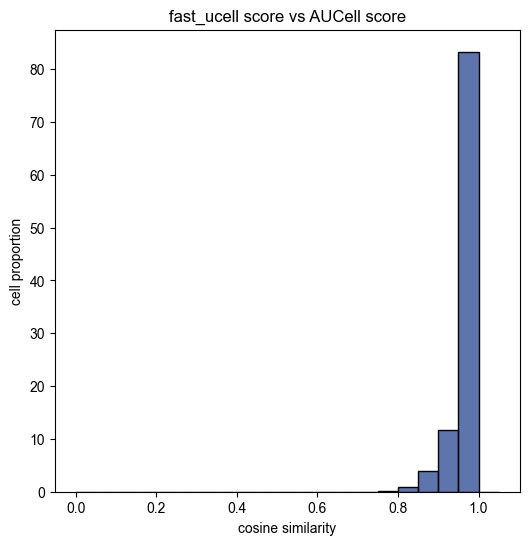

In [12]:
# 绘制相关系数的分布
plt.figure(figsize=(6, 6))
bins = np.arange(0, 1.1, 0.05)
sns.histplot(similarity_list3, bins=bins, kde=False, stat='percent',color='#274690')
plt.title('fast_ucell score vs AUCell score')
plt.xlabel('cosine similarity')
plt.ylabel('cell proportion')
#plt.savefig('./GSVA_SSGSEA_corr/20240715_CRC_TCGA_GSVA_ssGSEA_corr.pdf',bbox_inches = "tight",transparent=True)
plt.show()

In [13]:
min([min(similarity_list1),min(similarity_list2),min(similarity_list3)])

0.244320598019785

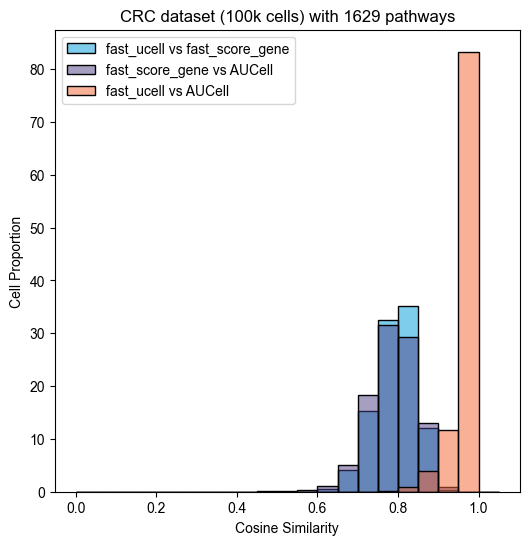

In [14]:
plt.figure(figsize=(6, 6))
bins = np.arange(0, 1.1, 0.05)  # 设置 bins 参数，使其在 -1 到 1 之间每隔 0.1 进行统计
sns.histplot(similarity_list1, bins=bins, kde=False, stat='percent', color='#009DDC', label='fast_ucell vs fast_score_gene', alpha=0.5)
sns.histplot(similarity_list2, bins=bins, kde=False, stat='percent', color='#4E4187', label='fast_score_gene vs AUCell', alpha=0.5)
sns.histplot(similarity_list3, bins=bins, kde=False, stat='percent', color='#F26430', label='fast_ucell vs AUCell', alpha=0.5)

plt.title('CRC dataset (100k cells) with 1629 pathways')
plt.xlabel('Cosine Similarity')
plt.ylabel('Cell Proportion')
plt.legend()
plt.savefig('/data/scPAFA_paper_formal/benchmark/compare_CRC_10k/20240804_CRC_histplpot.pdf',bbox_inches = "tight",transparent=True)
plt.show()